A notebook to summarize a large particle release experiment.

Three particle-release experiments where undertaken. 

1. 1000 particles initialized in SoG surface waters (0-50m)
2. 1000 paritcles initialized in SoG intermediate waters (50-200m)
3. 1000 particles initialized in SJdF deep waters (100-200m)

All particle trajectories were initialized on June 1, 2015 and integrated until Jul 31, 2015. Velocity fields from houlr nowcasts.  

In [3]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
import pandas as pd
import datetime
import os

from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
sns.set_color_codes()

In [4]:
grid_B=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
data=nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/01jul15/SalishSea_1d_20150701_20150701_grid_T.nc')
depth = data.variables['deptht'][:]

In [5]:
runs = ['SoG_surface', 'SoG_intermediate', 'JDF']
path = '/ocean/nsoontie/MEOPAR/Ariane/results/2month-summer/'

init_x={}; init_y={}; init_z={}
final_x={}; final_y={}; final_z={}; final_t={}; final_age={}; z={}
t_lon={}; t_lat={}; t_depth={}; t_time={};

for run in runs:
    f = nc.Dataset(os.path.join(path,run,'ariane_trajectories_qualitative.nc'))
    
    init_x[run] = f.variables['init_x']
    init_y[run] = f.variables['init_y']
    init_z[run]=  f.variables['init_z']
    
    final_x[run] = f.variables['final_x']
    final_y[run] = f.variables['final_y']
    final_z[run] = f.variables['final_z']
    final_age[run] = f.variables['final_age']
    final_t[run] = f.variables['final_t']
    z[run]=np.array(final_z[run][:],dtype=int)
    
    t_lat[run] = f.variables['traj_lat']
    t_lon[run] = f.variables['traj_lon']
    t_depth[run] = f.variables['traj_depth']
    t_time[run] = f.variables['traj_time']
    

#Initial Postions

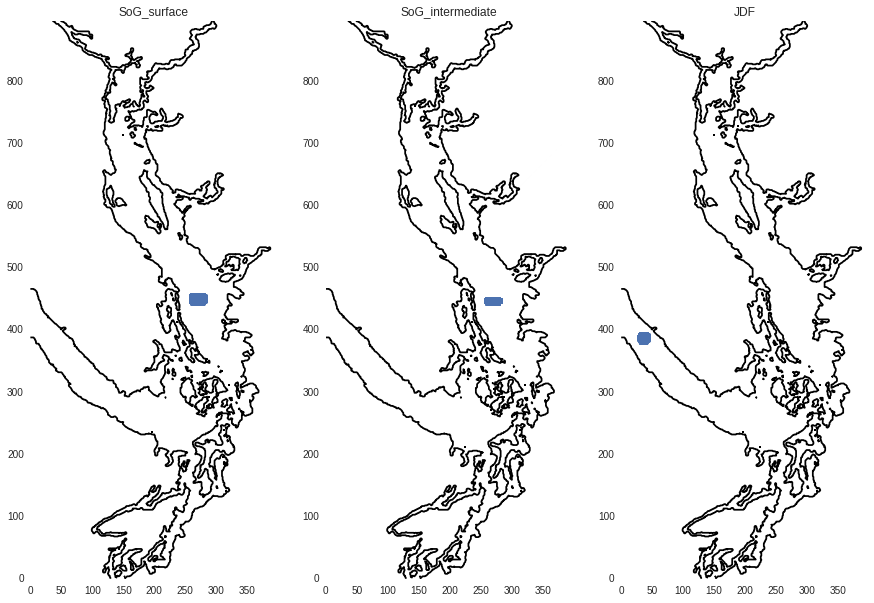

In [8]:
fig,axs = plt.subplots(1,3,figsize=(15,10))

for run,ax in zip(runs, axs):
    ax.plot(init_x[run],init_y[run],'bo')
    viz_tools.plot_coastline(ax,grid_B)
    ax.set_title(run)

#Final Positions

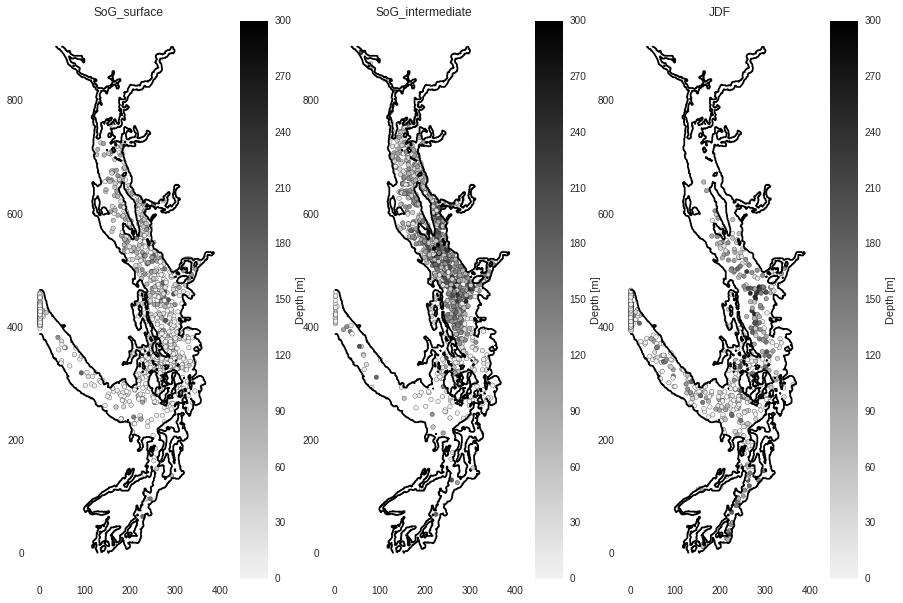

In [10]:
fig,axs = plt.subplots(1,3,figsize=(15,10))

cmap = sns.light_palette('black', as_cmap=True)

for run,ax in zip(runs, axs):
    mesh=ax.scatter(final_x[run],final_y[run],c=depth[z[run]],vmin=0,vmax=300,cmap=cmap)
    cbar=plt.colorbar(mesh,ax=ax)
    cbar.set_label('Depth [m]')
    viz_tools.plot_coastline(ax,grid_B)
    ax.set_title(run)

#Distribution

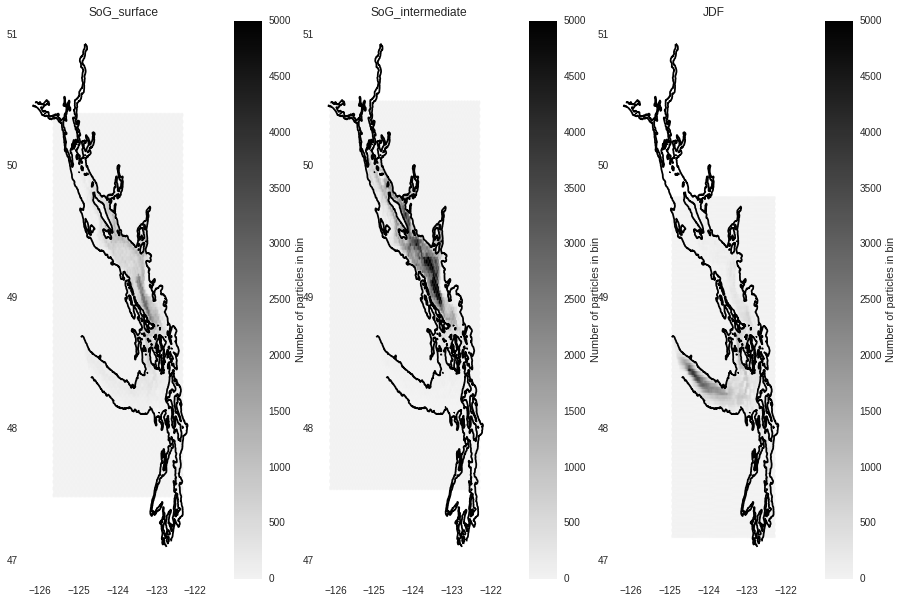

In [18]:
fig,axs = plt.subplots(1,3,figsize=(15,10))

cmap = sns.light_palette('black', as_cmap=True)

for run,ax in zip(runs, axs):
    mesh=ax.hexbin(t_lon[run][:].flatten(),t_lat[run][:].flatten(),cmap=cmap,vmin=0,vmax=5000)
    cbar=plt.colorbar(mesh,ax=ax)
    cbar.set_label('Number of particles in bin')
    viz_tools.plot_coastline(ax,grid_B,coords='map')
    ax.set_title(run)

Hmmm, I don't think the bin sizes are the same becuase the areas are different...

Will need to correct that.

Should have had ariane calculate the salinity/temperature of each particle as well... Can redo.